In [22]:
# !pip install scikit-learn

In [23]:
# Sepal length (cm): 꽃받침의 길이 (센티미터 단위)
# Sepal width (cm): 꽃받침의 너비
# Petal length (cm): 꽃잎의 길이
# Petal width (cm): 꽃잎의 너비

In [24]:
import pandas as pd
from sklearn.datasets import load_iris
# 1. 데이터 셋 불러오기
iris = load_iris()

# 2. DF변환 및 데이터 확인
# print(iris.feature_names)
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# print(iris.target)
df['target'] = iris.target
df.head(10)



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [25]:
# 3. 훈련/ 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train , Y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state=42)

In [28]:
# 4. 모델 학습
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train , Y_train)

#5. 예측 및 평가
Y_pred = knn.predict(X_test)
# Y_pred
# Y_test
from sklearn.metrics import accuracy_score, classification_report
print("정확도", accuracy_score(Y_test, Y_pred))
print("리포트:",classification_report(Y_test, Y_pred, target_names= iris.target_names))


정확도 1.0
리포트:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [29]:
import pandas as pd
df_result = pd.DataFrame({"실제값":Y_test,"예측값":Y_pred})
# iris.target_names
df_result
df_result["실제_클래스"] = df_result["실제값"].apply(lambda x : iris.target_names[x])
df_result["예측_클래스"] = df_result["예측값"].apply(lambda x : iris.target_names[x])

df_result.head(10)

,실제값,예측값,실제_클래스,예측_클래스
0,1,1,versicolor,versicolor
1,0,0,setosa,setosa
2,2,2,virginica,virginica
3,1,1,versicolor,versicolor
4,1,1,versicolor,versicolor
5,0,0,setosa,setosa
6,1,1,versicolor,versicolor
7,2,2,virginica,virginica
8,1,1,versicolor,versicolor
9,1,1,versicolor,versicolor


In [31]:
# 6. 새로운 데이터 예측
import numpy as np

new_data = np.array([[5.7, 3.8 ,1.2, 0.1]])
pred_class = knn.predict(new_data)
pred_class
print("예측 클래스:", iris.target_names[pred_class])

예측 클래스: ['setosa']


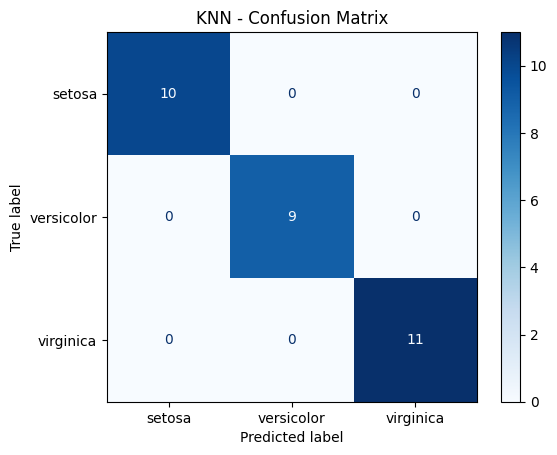

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels= iris.target_names)
disp.plot(cmap="Blues")
plt.title("KNN - Confusion Matrix")
plt.show()

In [ ]:
p